In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data and preprocessing

In [291]:
# Read Data
df=pd.read_csv('mm.csv',names=['x1','x2','x3','y'])


# Add part of theta 0 (OR) bias
df.insert(0,'x0',1)

# In Mini-Batch and Stocastic we prefer shuffle data 
# shuffle DataFrame
df = df.sample(frac=1)

# slice dataFrame to features and labels
col = df.shape[1]
x=np.matrix(df.iloc[:, 0:col-1])   # Features
y=np.matrix(df.iloc[:,col-1:col])  # Labels


In [292]:
#Initialize thetas
# theta=np.matrix(np.zeros(4))     # 4 is no.of Features
# theta

matrix([[0., 0., 0., 0.]])

In [293]:
theta=np.matrix([0.9,0.9,0.9,0.9])     # 4 is no.of Features
theta.shape

(1, 4)

## Cost Function

In [294]:
def CostFunction(X,Y,Theta):              # 1/2m * (summation(h(xi) - y )^2 )
    
    H_theta=X @ Theta.T                   # h(xi) OR y_predict
    
    error=  np.linalg.norm(H_theta - Y,ord=2)   #  norm( y_predict - y_target)
    
    error_square = error ** 2        
    
    MSE=(error_square/(2*len(Y)))
    
    return MSE 

## Gradient Function

In [295]:
def Gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(Theta.shape[1]))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(x) * np.sum(t)
    grad=temp
    return grad

# Adam Function  (mt & vt)

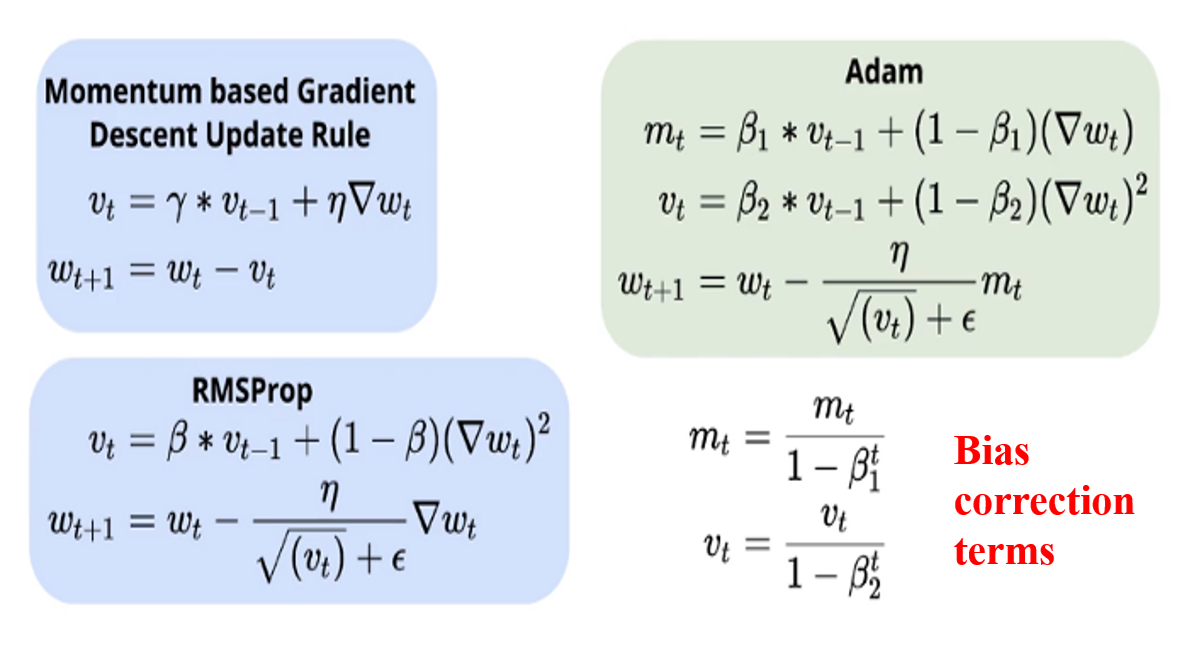

In [296]:
def Adam (X,Y,Theta,V,M,beta_1,beta_2):
    if len(V)==0 & len(M)==0:
        M.append(np.matrix(np.zeros(Theta.shape[1])))
        V.append(np.matrix(np.zeros(Theta.shape[1])))
        return V,M
    
    
    mt=(beta_1 * V[-1]) + ((1-beta_1) * Gradient(X,Y,Theta))
    M.append(mt)
    vt=(beta_2 * V[-1]) + ((1-beta_2) * (np.power(Gradient(X,Y,Theta),2)))
    V.append(vt)
    return V,M

# Mini-Batch Function

In [327]:
def MiniBatch(X,Y,Theta,lr,Epoch,NoBatch,beta_1,beta_2):
    temp=np.matrix(np.zeros(Theta.shape[1]))
    v=[]
    m=[]
    thetas_per_Epoch=[]
    cost_per_epoch=[]
    theta_parameters=int(Theta.ravel().shape[1])
    batch_size= int( len(Y)/ NoBatch)
    cost=0
    eps=0.00000000001

    for i in range (Epoch):
        
     
        for z in range(0,len(X),batch_size):
            
            # Slice Data depend on Batch size & no.of Batches
            x_new=X[z:z+batch_size]
            y_new=Y[z:z+batch_size]
            
            # call adam function to return vt and mt
            vt,mt = Adam(x_new , y_new ,Theta, v , m , beta_1 , beta_2)
            
            # Bias correction
            m_hat =(  mt[-1]   *  (1 / (1- (beta_1 ** (i+1) ) )  ) )
            v_hat =(  vt[-1]   *  (1 /( 1- (beta_2 ** (i+1) ) ) )  )
            
            #update theta after one Batch
            temp = Theta - (lr * m_hat)/(np.sqrt(v_hat)+eps)

            Theta=temp
            
        
        # append summution of costs after each epoch
        cost_per_epoch.append(CostFunction(X,Y,Theta))
        
        # append thetas after each epoch
        thetas_per_Epoch.append(Theta)
        
        #stop condition
        if i > 1:
            if np.abs(cost_per_epoch[i-1] - cost_per_epoch[i]) < 0.01:
                  break
            
    return Theta , thetas_per_Epoch, cost_per_epoch

### function parameters

In [328]:
lr=0.000001
epoch=100
no_batch=20
beta1=0.9
beta2=0.003

## Call Mini-Batch with Adam

In [329]:
th_op  , th_per_epoch , cost_per_epoch=MiniBatch(x,y,theta,lr,epoch,no_batch,beta1,beta2)

In [330]:
th_op

matrix([[0.89728504, 0.67009533, 0.66430674, 0.67853713]])

In [331]:
cost_per_epoch[-1]

5.960072619242899

## Graph (Cost/Batch  & iterations)

Text(0, 0.5, 'Cost Value')

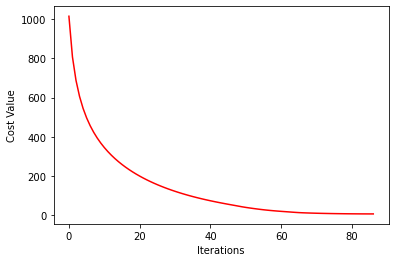

In [332]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost_per_epoch)), cost_per_epoch ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

## Graph (Cost/epoch)

Text(0, 0.5, 'Cost Value')

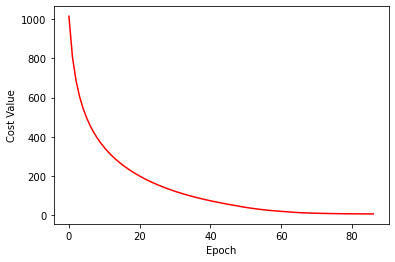

In [303]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost_per_epoch)), cost_per_epoch ,'r')

ax.set_xlabel('Epoch')
ax.set_ylabel('Cost Value')

In [304]:
th_epoch=np.array(th_per_epoch)
th_batch=np.array(th_per_batch)

Text(0, 0.5, 'Cost Value')

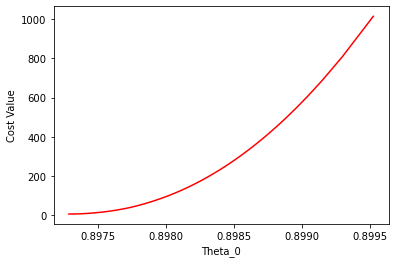

In [305]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,0], cost_per_epoch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

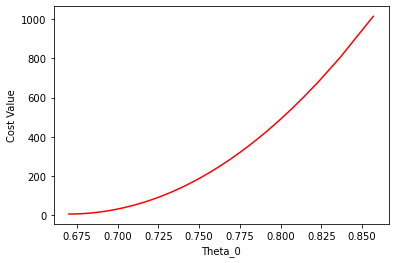

In [306]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,1], cost_per_epoch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

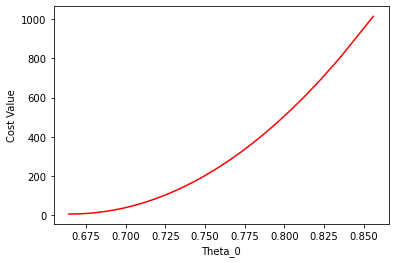

In [307]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,2], cost_per_epoch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

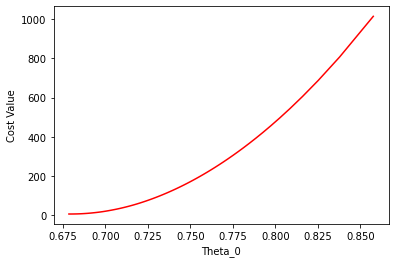

In [308]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,3], cost_per_epoch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

In [309]:
y_hat=x@th_op.T

In [310]:
from sklearn.metrics import r2_score


In [311]:
r2_score(df.y , y_hat)

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.9785222156094141